## Соколов Игорь

In [119]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import scipy.stats as sts
import math
%matplotlib inline

Text(0.5,0,'x')

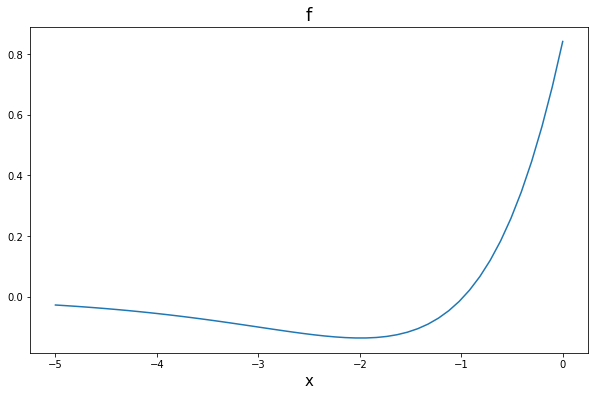

In [120]:
def f(x):
    return x*np.exp(x) + np.sin(np.exp(x))

a,b = -5,0
plt.figure(figsize=(10,6))
plt.plot(np.linspace(a,b), f(np.linspace(a,b)))
plt.title("f", fontsize=18)
plt.xlabel('x', fontsize=15)

# 1)

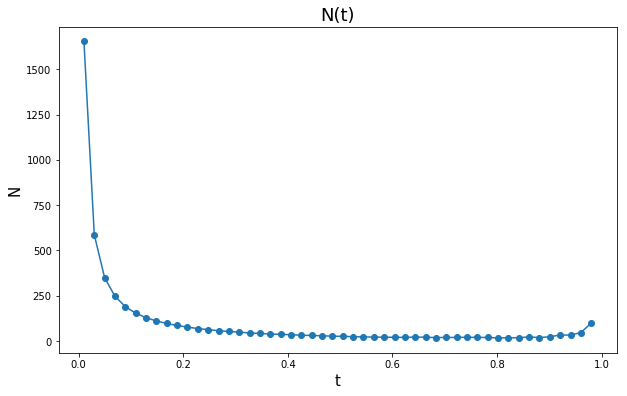

In [121]:
def t_search(f, a, b, t, eps):
    c = a + t*(b - a)
    f_a = f(a)
    f_b = f(b)
    f_c = f(c)
    f_list = []
    x_list = []
    k = 0
    while abs(b - a) > eps:
        y = a + t*(c - a) 
        z = b + t*(c - b) 
        f_y = f(y)
        f_z = f(z)
        if f_y <= f_c:
            b = c
            c = y
            f_b = f_c
            f_c = f_y
        else:
            if f_c <= f_z:
                a = y
                b = z
                f_a = f_y
                f_b = f_z
            else:
                a = c
                c = z
                f_a = f_c
                f_c = f_z
        #f_list.append(f_c)
        #x_list.append((a+b)/2 )
        k += 1
    return k

T = np.linspace(start=0.01, stop=1, num=50, endpoint=False)

N_iter = 5
eps = 1e-07

N = np.zeros(len(T))
it = np.zeros(N_iter)

for j in range(len(T)):
    for i in range(N_iter):
        it[i] = t_search(f,a,b,T[j], eps)
    #print (it)
    N[j] = it.mean()
    
plt.figure(figsize=(10,6))
plt.plot(T, N, '-o')
plt.title("N(t)", fontsize=18)
plt.xlabel('t', fontsize=15)
plt.ylabel('N', fontsize=15)

T_1, N_1 = T.copy(), N.copy()

# 2)

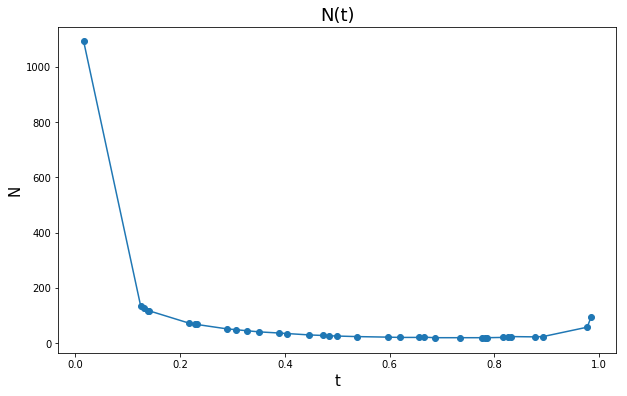

In [122]:
len_t = 35

uniform_rv = sts.uniform(0, 1)

T = uniform_rv.rvs(len_t).copy()
T.sort()

N = np.zeros(len_t)

for j in range(len(T)):
    for i in range(N_iter):
        it[i] = t_search(f,a,b,T[j], eps)
    #print (it)
    N[j] = it.mean()

plt.figure(figsize=(10,6))
plt.plot(T, N,'o-')

#plt.errorbar(x, y, xerr=0, yerr=0.4)

plt.title("N(t)", fontsize=18)
plt.xlabel('t', fontsize=15)
plt.ylabel('N', fontsize=15)

#plt.fill_between(T, N - np.full((1, len_t), uniform_rv.var())[0], N + np.full((1, len_t), uniform_rv.var())[0], alpha=0.3)
#print ('Variance=', uniform_rv.var())

T_2, N_2 = T.copy(), N.copy()

# Сравнение

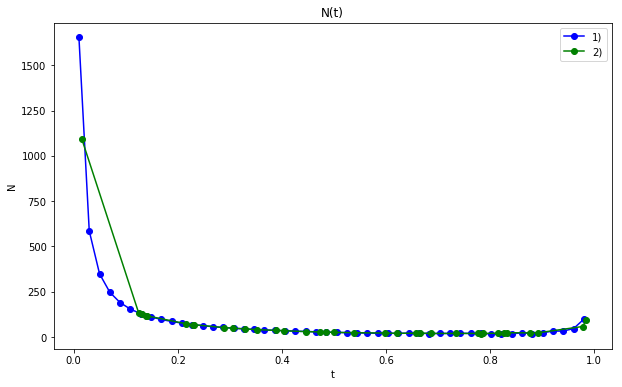

In [123]:
plt.figure(figsize=(10,6))
plt.plot(T_1, N_1, '-o', label='1)', color='blue')
plt.plot(T_2, N_2, '-o', label='2)', color='green')

plt.xlabel('t')
plt.ylabel('N')
plt.title('N(t)')
plt.legend(loc = "upper right")
plt.show()